In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection  import train_test_split

# Data Import And Train/Test Splitting

In [125]:
df = pd.read_csv('../data_DO_NOT_PUSH/churn_train.csv')

In [126]:
X = df.drop('last_trip_date', axis = 1)

In [165]:
y = pd.to_datetime(df['last_trip_date'])
churn_date = y.max() - pd.to_timedelta(30, unit='d')
churn_date
y = y <= churn_date  #True = users that churned
y.name = 'churn'
y.head()


0    True
1    True
2    True
3    True
4    True
Name: churn, dtype: bool

In [166]:
y.sum() / len(y)
#63% churn! Which is more or less balanced

0.634125

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 54)

# Data Cleaning

In [168]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 10624 to 7279
Data columns (total 11 columns):
avg_dist                  30000 non-null float64
avg_rating_by_driver      29890 non-null float64
avg_rating_of_driver      25123 non-null float64
avg_surge                 30000 non-null float64
city                      30000 non-null object
phone                     29762 non-null object
signup_date               30000 non-null object
surge_pct                 30000 non-null float64
trips_in_first_30_days    30000 non-null int64
luxury_car_user           30000 non-null bool
weekday_pct               30000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 2.5+ MB


In [171]:
X_train['rating_by_driver_null']  = X_train['avg_rating_by_driver'].isnull().astype(int)
X_train['rating_of_driver_null']  = X_train['avg_rating_of_driver'].isnull().astype(int)

X_train['luxury_car_user'] = X_train['luxury_car_user'].astype(int)

/Users/LB/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/LB/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/LB/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [172]:
X_train = pd.concat([X_train, pd.get_dummies(X_train['phone']), pd.get_dummies(X_train['city'], prefix = 'city')], axis = 1)


In [173]:
X_train.drop('phone', axis = 1, inplace = True)
X_train.drop('city', axis = 1, inplace = True)

In [174]:
X_train.sample(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,rating_by_driver_null,rating_of_driver_null,Android,iPhone,city_Astapor,city_King's Landing,city_Winterfell
30240,3.60,4.6,5.0,1.55,2014-01-29,20.0,0,0,20.0,0,0,0,1,1,0,0
1898,7.05,4.6,5.0,1.00,2014-01-23,0.0,4,1,80.0,0,0,0,1,0,0,1
380,7.22,5.0,5.0,1.00,2014-01-31,0.0,0,0,0.0,0,0,0,1,0,1,0
1105,2.71,4.9,4.9,1.03,2014-01-04,5.3,0,0,47.4,0,0,0,1,0,1,0
2270,2.79,5.0,NaN,1.00,2014-01-26,0.0,1,1,0.0,0,1,0,1,1,0,0
9882,3.35,5.0,4.5,1.88,2014-01-26,50.0,2,0,0.0,0,0,0,1,0,0,1
12274,3.05,5.0,5.0,1.00,2014-01-07,0.0,0,0,0.0,0,0,1,0,0,1,0
8642,1.98,4.5,NaN,1.00,2014-01-16,0.0,1,0,100.0,0,1,0,1,0,0,1
38852,1.39,5.0,5.0,1.00,2014-01-18,0.0,2,0,0.0,0,0,0,1,1,0,0
31125,36.30,4.0,NaN,1.00,2014-01-19,0.0,0,1,0.0,0,1,0,1,0,0,1


# EDA

In [175]:
df_train = pd.concat([X_train, y_train.astype(int)], axis = 1)

In [182]:
df_train_plot = df_train.copy()

In [ ]:
df_train

array([ 0.18787366,  0.20288295, -0.09093051, -0.08286187,  0.18333796])

In [200]:
def add_jitter(df, bool_col):
    return df[bool_col] + ((np.random.random(df.shape[0]) -.5) / 2)

In [207]:
bool_cols = ["luxury_car_user", "rating_by_driver_null", "rating_of_driver_null", "Android",
             "iPhone",  "city_Astapor", "city_King's Landing", 
            "city_Winterfell", "churn"]
float_cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'signup_date', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']
float_target_cols =  float_cols + ["churn"]


In [209]:
float_target_cols

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'signup_date',
 'surge_pct',
 'trips_in_first_30_days',
 'weekday_pct',
 'churn']

/Users/LB/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/LB/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/LB/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/LB/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  bin

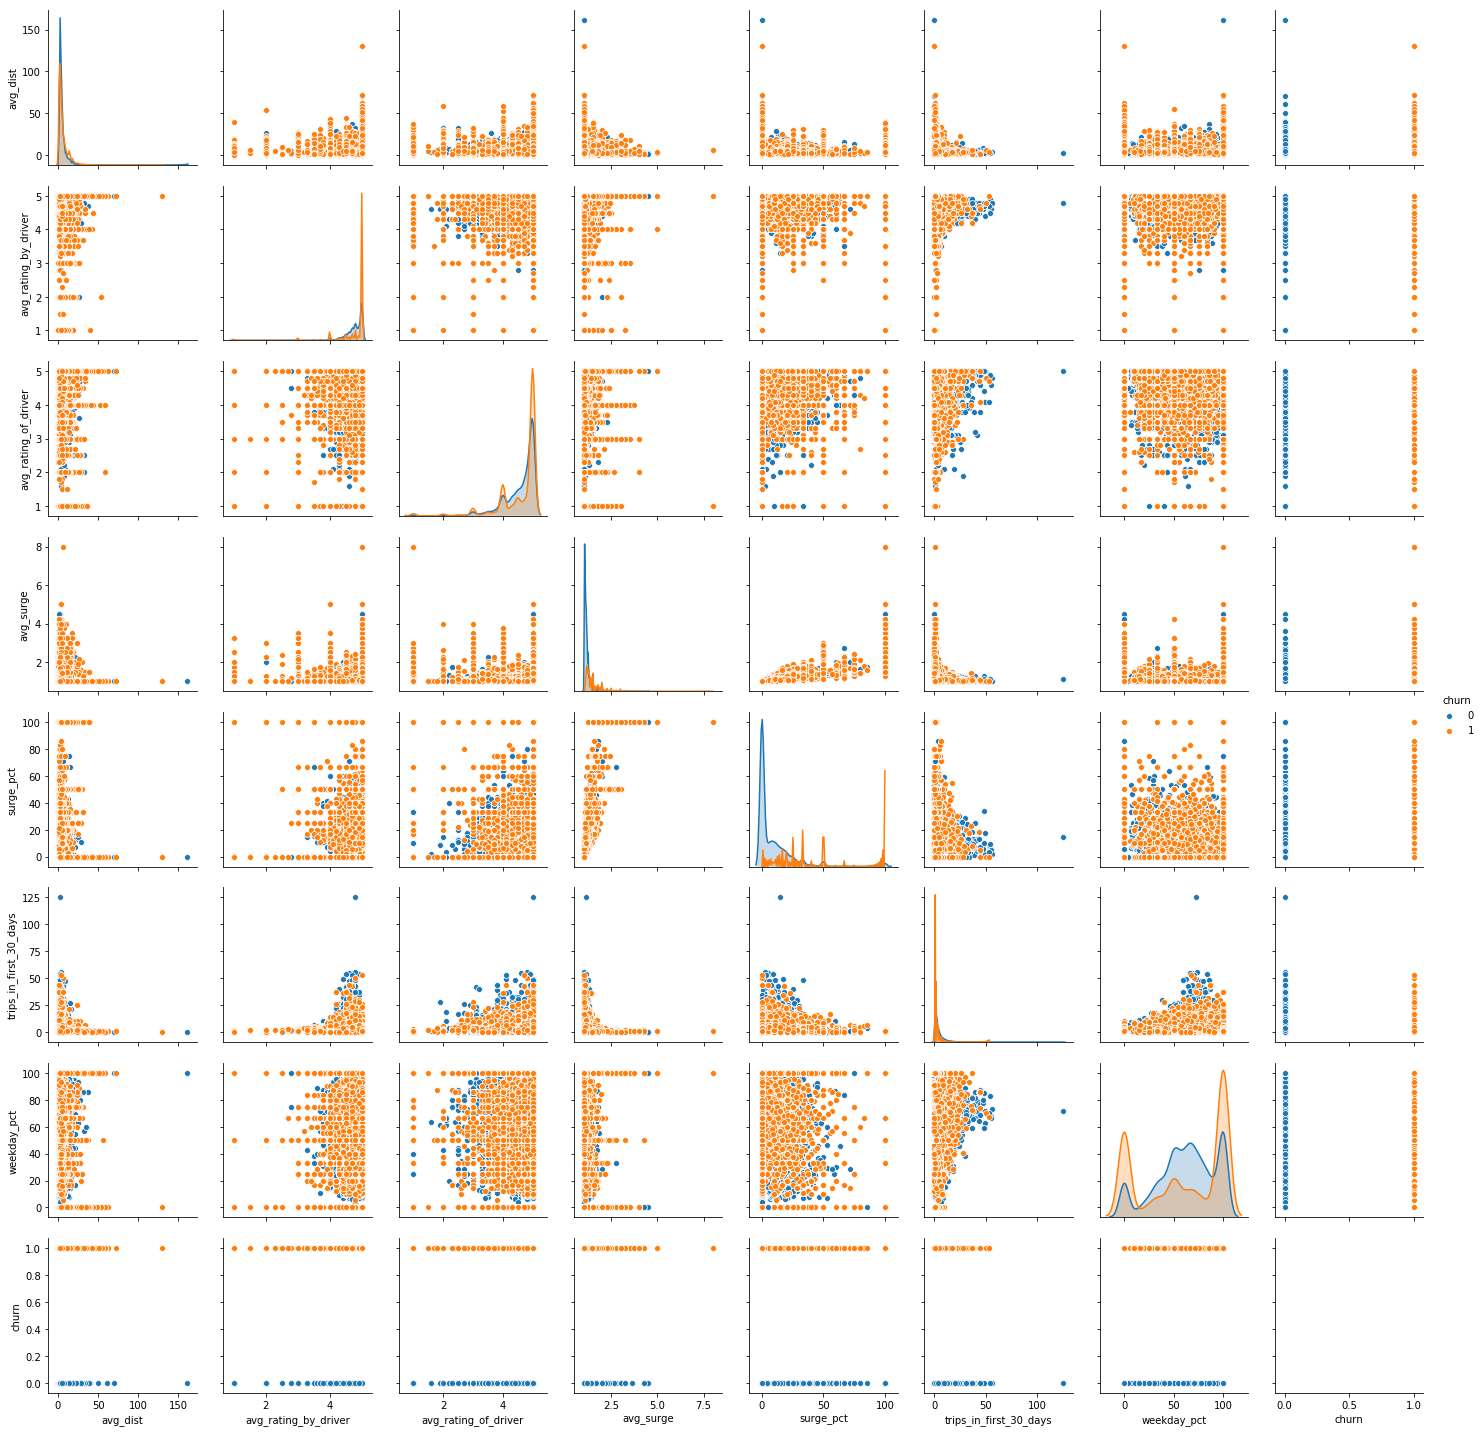

In [208]:
#plt.figure ()
sns.pairplot(df_train[float_target_cols], hue = 'churn')

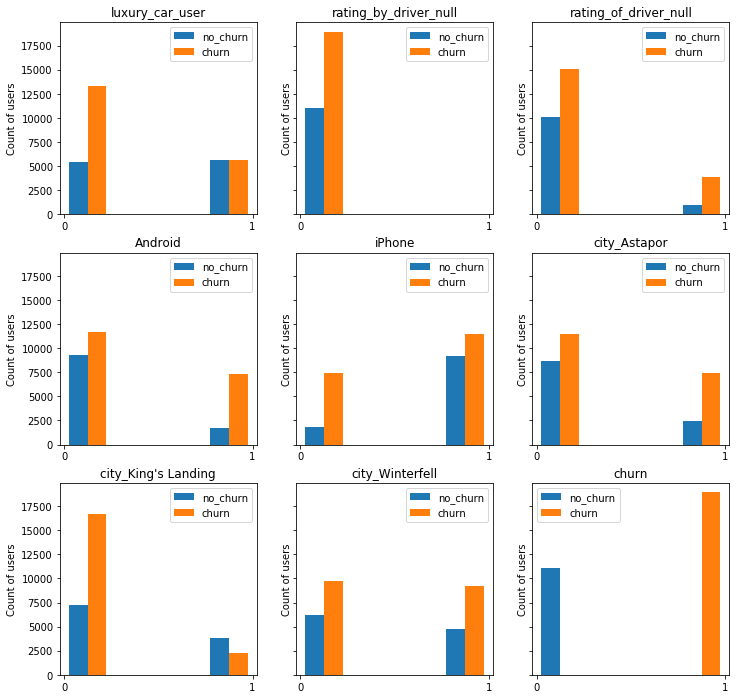

In [251]:
#example: lux car user 

fig, axs = plt.subplots(3, 3, figsize = (12, 12), sharey="all",)

for ax, col in zip(axs.flatten(), bool_cols):
    churn = df_train[df_train["churn"] == 1][col]
    no_churn = df_train[df_train["churn"] == 0][col]
    ax.hist([no_churn, churn], bins = 4, label = ["no_churn", "churn"])
    #plt.hist(no ,label = "no") # color = df_train['churn'].apply(lambda x: 'b' if x == 0 else 'orange' ))
    ax.legend()
    ax.set_title(col)
    #ax.set_xlabel(col)
    ax.set_xticks([0, 1])
    ax.set_ylabel("Count of users")

In [231]:
len(bool_cols)

9

In [222]:
df_train.sample(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,rating_by_driver_null,rating_of_driver_null,Android,iPhone,city_Astapor,city_King's Landing,city_Winterfell,churn
16122,7.00,4.9,4.9,1.14,2014-01-24,18.2,1,1,90.9,0,0,0,1,0,1,0,0
703,8.40,5.0,NaN,1.00,2014-01-17,0.0,0,0,50.0,0,1,0,1,0,1,0,0
20340,7.45,5.0,5.0,1.00,2014-01-08,0.0,0,1,100.0,0,0,0,1,1,0,0,1
34986,8.12,4.8,4.5,1.00,2014-01-27,0.0,0,0,50.0,0,0,1,0,1,0,0,0
39998,3.49,4.3,3.3,1.50,2014-01-08,40.0,5,0,60.0,0,0,0,1,1,0,0,1
14457,2.60,4.8,3.5,1.09,2014-01-21,18.2,3,1,63.6,0,0,0,0,1,0,0,0
10537,7.99,5.0,NaN,1.00,2014-01-11,0.0,1,1,0.0,0,1,1,0,0,0,1,1
813,4.33,5.0,5.0,1.00,2014-01-24,0.0,0,0,100.0,0,0,1,0,1,0,0,1
29664,4.77,4.6,4.9,1.00,2014-01-04,0.0,0,0,100.0,0,0,0,1,0,0,1,1
26120,2.82,5.0,4.0,1.25,2014-01-17,25.0,1,0,25.0,0,0,0,1,1,0,0,1


In [215]:
df_train['churn'].apply(lambda x: 'b' if x == 0 else 'orange' )

10624         b
28242    orange
38345    orange
240      orange
9258          b
24576         b
16623         b
25405    orange
737           b
36289    orange
28197    orange
34481         b
5592          b
26864    orange
20036         b
37503         b
35667    orange
4782     orange
23907    orange
27598    orange
33783    orange
17250    orange
13661    orange
29826    orange
10112    orange
15160    orange
23055    orange
35265    orange
35519    orange
11157         b
          ...  
8594          b
12679    orange
39591         b
26545    orange
13208    orange
27802    orange
28729         b
21564    orange
10294    orange
19026    orange
16129    orange
37234    orange
2327     orange
38160         b
38974    orange
26836    orange
30678    orange
39454         b
5133     orange
25908    orange
3316     orange
12996    orange
21097    orange
13321         b
18449         b
11584    orange
28385         b
5143     orange
17282    orange
7279     orange
Name: churn, Length: 300